Epoch 1/5
782/782 [==============================] - 60s 76ms/step - loss: 1.6500 - accuracy: 0.3918
Epoch 2/5
782/782 [==============================] - 60s 77ms/step - loss: 1.2961 - accuracy: 0.5358
Epoch 3/5
782/782 [==============================] - 58s 74ms/step - loss: 1.1494 - accuracy: 0.5951
Epoch 4/5
782/782 [==============================] - 61s 78ms/step - loss: 1.0578 - accuracy: 0.6286
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.9859 - accuracy: 0.6556
Loss: 0.9859116077423096
Accuracy: 0.6556000113487244


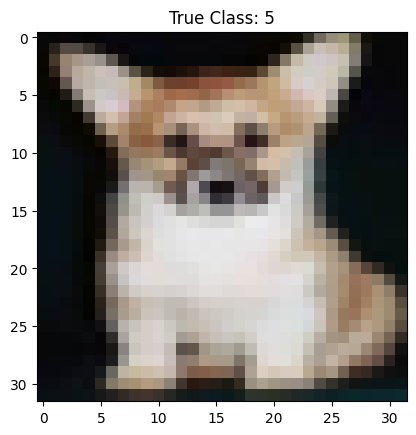

1/1 [==============================] - 0s 92ms/step
[[2.3863201e-04 3.3721033e-06 7.0711982e-04 1.4549862e-01 4.6232788e-04
  8.4952116e-01 2.1757488e-04 3.2549885e-03 7.9864505e-05 1.6340571e-05]]
Predicted class: 5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
import random

# Load CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

# Data preprocessing
X_train = X_train / 255.0
X_test = X_test / 255.0

# Define model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 classes in CIFAR-10
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, Y_train, epochs=5, batch_size=64)

# Evaluate model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

# Visualize predictions
id = random.randint(0, len(Y_test))
plt.imshow(X_test[id, :]) #To show the image at the random number i.e. id chosen.
plt.title(f"True Class: {Y_test[id][0]}")
plt.show()

y_pred = model.predict(X_test[id, :].reshape(1, 32, 32, 3))
print(y_pred)
y_pred_class = np.argmax(y_pred)
print(f"Predicted class: {y_pred_class}")

# Save model
model.save('CIFAR10.h5')

# Load saved model
loaded_model = tf.keras.models.load_model('CIFAR10.h5')


In [ ]:
#Output Description
# 782--total no.of batches per epoch.
#epoch--an iteration through entire data.